In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
import time
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import gc
import os
print(os.listdir("../input"))

['embeddings', 'sample_submission.csv', 'test.csv', 'train.csv']


In [3]:
train_data=pd.read_csv("../input/train.csv")
test_data=pd.read_csv("../input/test.csv")

In [4]:
train_data.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


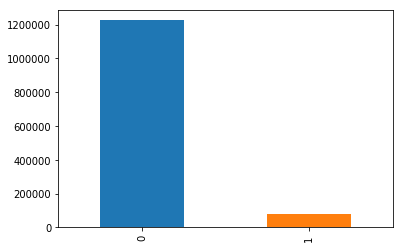

In [5]:
train_data['target'].value_counts().plot(kind='bar')

In [6]:
test_data.head()

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


In [7]:
train_text=train_data['question_text'].values.tolist()
train_y=train_data['target'].values.tolist()
test_text=test_data['question_text'].values.tolist()
idfinal=test_data['qid'].values.tolist()


In [8]:
tfidf=TfidfVectorizer(#stop_words='english',
                      min_df=23,
                      max_df=0.90,
                      ngram_range=(1, 4),
                      smooth_idf=True,
                      sublinear_tf=True)#,token_pattern='(\S+)'

In [9]:
tfidf.fit(train_text+test_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=23,
        ngram_range=(1, 4), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=True,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [10]:
train_X = tfidf.transform(train_text)
train_X
#20,0.85 -1306122x60935

<1306122x163954 sparse matrix of type '<class 'numpy.float64'>'
	with 28021504 stored elements in Compressed Sparse Row format>

In [ ]:
del train_data
del test_data
del train_text
gc.collect()

In [ ]:
vocab=tfidf.vocabulary_

In [ ]:
list(vocab)[:5]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.2, random_state=1)

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [ ]:
#len(y_train),len(y_val),len(y_test)
y_train.count(1),y_test.count(1)

In [ ]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr',max_iter=1000)
LR.fit(X_train, y_train)

In [ ]:
y_test_pred= LR.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))  
print(classification_report(y_test, y_test_pred)) 

In [ ]:
del X_train
del LR

gc.collect()

In [ ]:
#doing hyper parameter tuning in hope of better results

In [ ]:
#clf = GridSearchCV(LR, hyperparameters, cv=5, verbose=0)
clf = LogisticRegression()
grid_values = {'penalty': ['l1'],'C':[1,5,10]}
#scoring = ['recall']
grid_clf_acc = GridSearchCV(clf,
                            param_grid = grid_values,
                            scoring = 'f1',
                            n_jobs=-1,
                            cv=3, 
                            verbose=50,
                            refit=True)

In [ ]:
#training on the entire dataset
best_model = grid_clf_acc.fit(train_X, train_y)

In [ ]:
pen=best_model.best_estimator_.get_params()['penalty']
reg=best_model.best_estimator_.get_params()['C']
#sol=best_model.best_estimator_.get_params()['solver']
pen,reg


In [ ]:
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
#print('Best solver: ', best_model.best_estimator_.get_params()['solver'])

In [ ]:
gc.collect()

In [ ]:
y_test_pred= best_model.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))  
print(classification_report(y_test, y_test_pred)) 

In [ ]:
test_X = tfidf.transform(test_text)
test_X #12 0.90 ~ same with 0.85

In [ ]:
test_y=best_model.predict(test_X)
test_y

In [ ]:
#idfinal=test_data['qid'].values.tolist()  #already imported above
idfinal[:5]

In [ ]:
list_of_tuples = list(zip(idfinal,test_y))
list_of_tuples[:5]

In [ ]:
submission = pd.DataFrame(list_of_tuples, columns = ['qid','prediction']) 

In [ ]:
submission.head()

In [ ]:
submission.to_csv('submission.csv',index=False)